# Лабораторная работа №1
# Выполнил: Игошин Андрей, группа 18 МАГ ИАД

Импортируем необходимые библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
path = os.path

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Пути к датасетам:

In [2]:
datasets_dir = '../datasets'
dota2_dir = path.join(datasets_dir, 'dota-2/')

Сформируем описание

In [3]:
heroes_url = path.join(dota2_dir, 'heroes.json') 
heroes_data = pd.read_json(heroes_url)
heroes = list(map(lambda hero: hero['name'], heroes_data['heroes']))
description = ['team_win', 'cluster_id', 'game_mode', 'game_type'] + heroes

Прочитаем train.csv и test.csv. Соберем train.csv и test.csv в единый dataframe.

In [4]:
train_url = path.join(dota2_dir, 'train.csv')
test_url = path.join(dota2_dir, 'test.csv')

data_train = pd.read_csv(train_url, index_col=False, sep = ',', engine = 'python', names=description)
data_test = pd.read_csv(test_url, index_col=False, sep = ',', engine = 'python', names=description)
data = pd.concat([data_train, data_test], ignore_index=True)

Убедимся, что тип -- это DataFrame

In [5]:
type(data)

pandas.core.frame.DataFrame

Посмотрим, что содержится в данных:

In [6]:
data

,team_win,cluster_id,game_mode,game_type,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden
0,-1,223,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,154,2,2,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
5,1,122,2,3,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,1,224,8,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-1,227,8,3,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-1,111,2,3,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,-1,151,2,2,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


Посмотрим первые 5 (по умолчанию) строк:

In [7]:
data.head()

,team_win,cluster_id,game_mode,game_type,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden
0,-1,223,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,154,2,2,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0


Посмотрим последние 5 (по умолчанию) строк:

In [8]:
data.tail()

,team_win,cluster_id,game_mode,game_type,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden
102939,1,121,2,2,0,0,0,0,0,0,...,0,0,-1,0,0,0,0,0,0,0
102940,1,154,9,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102941,1,122,9,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
102942,1,152,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102943,-1,184,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0


 - `team_win` – Team won the game (1 or -1)
 - `cluster_id` –  Cluster ID (related to location)
 - `game_mode` - Game mode (eg All Pick)
 - `game_type` - Game type (eg. Ranked)
 - `...end` - Each element is an indicator for a hero. Value of 1 indicates that a player from team '1' played as that hero and '-1' for the other team. Hero can be selected by only one player each game. This means that each row has five '1' and five '-1' values.


Посмотри размерность матрицы и список имен колонок:

In [9]:
print(data.shape)
print(data.columns)

(102944, 116)
Index(['team_win', 'cluster_id', 'game_mode', 'game_type', 'antimage', 'axe',
       'bane', 'bloodseeker', 'crystal_maiden', 'drow_ranger',
       ...
       'legion_commander', 'ember_spirit', 'earth_spirit', 'abyssal_underlord',
       'terrorblade', 'phoenix', 'techies', 'oracle', 'winter_wyvern',
       'arc_warden'],
      dtype='object', length=116)


Посмотри индексы строк:

In [10]:
data.index

RangeIndex(start=0, stop=102944, step=1)

Посмотрим данные, сожержащиеся в 3 строке в колонке `antimage`:

In [11]:
data.at[2, 'antimage']

0

Посмотрим столбец antimage:

In [12]:
data['antimage']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11       -1
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        1
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        1
29        0
         ..
102914    0
102915   -1
102916    0
102917   -1
102918    0
102919    0
102920    0
102921    0
102922    0
102923    0
102924    0
102925    0
102926    0
102927    0
102928    0
102929    0
102930    0
102931    0
102932    0
102933    0
102934    0
102935    0
102936    0
102937    0
102938    0
102939    0
102940    0
102941    0
102942    0
102943    0
Name: antimage, Length: 102944, dtype: int64

Посмотрим тип значения в колонке antimage:

In [13]:
data['antimage'].dtype.name

'int64'

Постмотрим тип самой колонки antimage:

In [14]:
type(data['antimage'])

pandas.core.series.Series

Возьмем первые 5 (по умолчанию) строк нашего dataset взяв лишь значения столбцов team_win и antimage:

In [15]:
data[['team_win', 'antimage']].head()

,team_win,antimage
0,-1,0
1,1,0
2,1,0
3,1,0
4,-1,0


Посмотрим, что какие же данные содержатся в столбцах 'team_win', 'game_mode', 'game_type', 'antimage', 'storm_spirit'

In [16]:
data[['team_win', 'game_mode', 'game_type', 'antimage', 'storm_spirit']].describe()

,team_win,game_mode,game_type,antimage,storm_spirit
count,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000
mean,0.054632,3.319931,2.384986,-0.001622,-0.000670
std,0.998511,2.635202,0.486993,0.401622,0.355076
min,-1.000000,1.000000,1.000000,-1.000000,-1.000000
25%,-1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,2.000000,2.000000,0.000000,0.000000
75%,1.000000,2.000000,3.000000,0.000000,0.000000
max,1.000000,9.000000,3.000000,1.000000,1.000000


Думаю, что не имеет смысл выводить `scatter_matrix`, поскольку все признаки либо дискретные, либо категориальные, вследствие чего данный график не покажет ничего важного.

In [17]:

# from pandas.plotting import scatter_matrix
# scatter_matrix(data, alpha = .01, figsize = (120, 120))
# pass

Посмотрим, как коррелируют значения матррицы между собой:

In [18]:
data.corr()

,team_win,cluster_id,game_mode,game_type,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden
team_win,1.000000,0.000085,0.001003,-0.000822,-0.026352,0.024459,-0.015220,0.005598,0.032177,0.031036,...,0.044234,-0.012316,-0.010790,-0.044965,-0.024381,NaN,-0.004655,0.006045,-0.023186,-0.021388
cluster_id,0.000085,1.000000,0.183974,0.001243,0.002200,0.001803,-0.003500,0.004412,0.005072,-0.003490,...,-0.004427,0.003755,-0.004736,0.003376,-0.001385,NaN,0.003025,0.000788,-0.002215,-0.006606
game_mode,0.001003,0.183974,1.000000,-0.149547,0.002445,0.005127,0.001782,0.001868,0.002125,0.001782,...,0.002807,-0.000594,0.000072,0.003828,-0.003180,NaN,0.007157,0.002392,0.006542,0.001259
game_type,-0.000822,0.001243,-0.149547,1.000000,-0.001078,-0.002257,0.001580,-0.003629,0.001881,0.000541,...,-0.001416,-0.002687,0.001656,0.000500,-0.000091,NaN,0.001332,-0.003691,0.003491,0.004546
antimage,-0.026352,0.002200,0.002445,-0.001078,1.000000,-0.010146,0.000306,-0.035819,-0.007439,-0.039493,...,0.001034,-0.033203,-0.004824,-0.011057,-0.000768,NaN,-0.020371,-0.001519,-0.001869,0.001918
axe,0.024459,0.001803,0.005127,-0.002257,-0.010146,1.000000,-0.000121,-0.024029,-0.007950,-0.009576,...,-0.023307,-0.046667,-0.015237,-0.008043,-0.009916,NaN,-0.007623,-0.009029,-0.006157,-0.004398
bane,-0.015220,-0.003500,0.001782,0.001580,0.000306,-0.000121,1.000000,-0.003628,-0.009392,-0.009352,...,-0.002985,-0.010729,-0.006534,-0.000216,0.001879,NaN,0.002373,-0.000588,-0.005199,-0.001858
bloodseeker,0.005598,0.004412,0.001868,-0.003629,-0.035819,-0.024029,-0.003628,1.000000,-0.007908,-0.016645,...,-0.007768,-0.027203,-0.007453,-0.007227,0.000536,NaN,-0.011041,-0.004943,-0.006819,-0.006378
crystal_maiden,0.032177,0.005072,0.002125,0.001881,-0.007439,-0.007950,-0.009392,-0.007908,1.000000,-0.017566,...,-0.016022,-0.013842,-0.010602,-0.004337,-0.010242,NaN,-0.001970,-0.019256,-0.014149,-0.015434
drow_ranger,0.031036,-0.003490,0.001782,0.000541,-0.039493,-0.009576,-0.009352,-0.016645,-0.017566,1.000000,...,-0.013815,-0.034209,-0.003596,-0.019886,-0.011810,NaN,-0.021970,-0.011311,0.001200,-0.010520


Посмтрим, как часто выбирают опрделенные game_type и game_mode вместе:

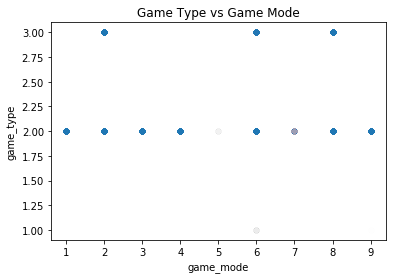

In [19]:
plt.plot(data['game_mode'], data['game_type'], 'o', alpha = 0.002)
plt.xlabel('game_mode')
plt.ylabel('game_type')
plt.title('Game Type vs Game Mode')
pass

На данном графике мы можем видеть, что очень редко выбирают пары (game_mode, game_type): (5, 2), (6, 1)  
Наиболее часто сочетания: (1, 4), (2, 2), (2, 3), (3, 2), (4, 2), (6, 2), (6, 3), (8, 3), (8, 3), (9, 2)  
Также встречается сочетание (7, 2), но не очень часто и неочень редко  
Вероятно, что других сочетаний не встречается. Чтобы это проверить увеличим alpha параметр и посмотрим на график.

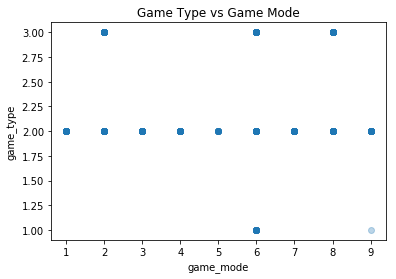

In [20]:
plt.plot(data['game_mode'], data['game_type'], 'o', alpha = 0.3)
plt.xlabel('game_mode')
plt.ylabel('game_type')
plt.title('Game Type vs Game Mode')
pass

Можем заметить, что также встречается сочетание (9, 1), но гораздо реже, чем сотальные возможные варианты. Учитывая, что прозрачность точек - 0.3 то, даже если была бы хотябы одна точка в любом другом месте, то мы бы ее заметили, поэтому можем полагать, что другие варианты невозможны. 

Посмотрим в каких строках game_mode == 2:

In [21]:
data['game_mode'] == 2

0          True
1          True
2          True
3          True
4          True
5          True
6         False
7         False
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19        False
20         True
21         True
22         True
23         True
24        False
25         True
26         True
27         True
28         True
29        False
          ...  
102914    False
102915     True
102916     True
102917     True
102918     True
102919     True
102920     True
102921     True
102922     True
102923     True
102924     True
102925     True
102926    False
102927     True
102928     True
102929    False
102930     True
102931     True
102932     True
102933     True
102934     True
102935     True
102936    False
102937     True
102938     True
102939     True
102940    False
102941    False
102942     True
102943     True
Name: game_mode, Length:

Посмотрим все признаки с целыми значениями:

In [22]:
data.describe(include = ['int'])

,team_win,cluster_id,game_mode,game_type,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden
count,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,...,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.0,102944.000000,102944.000000,102944.000000,102944.000000
mean,0.054632,175.876156,3.319931,2.384986,-0.001622,-0.000583,0.000602,-0.000719,-0.002399,0.002924,...,-0.000806,-0.001059,-0.000457,0.000729,0.000447,0.0,0.000991,0.000855,-0.000291,-0.000078
std,0.998511,35.661004,2.635202,0.486993,0.401622,0.467470,0.165803,0.354597,0.329704,0.483529,...,0.254143,0.534819,0.205964,0.284102,0.155024,0.0,0.220649,0.204709,0.168823,0.189020
min,-1.000000,111.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,152.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.000000,156.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1.000000,223.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.000000,261.000000,9.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


Посмотрим все признаки:

In [23]:
data.describe(include = 'all')

,team_win,cluster_id,game_mode,game_type,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden
count,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,...,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.0,102944.000000,102944.000000,102944.000000,102944.000000
mean,0.054632,175.876156,3.319931,2.384986,-0.001622,-0.000583,0.000602,-0.000719,-0.002399,0.002924,...,-0.000806,-0.001059,-0.000457,0.000729,0.000447,0.0,0.000991,0.000855,-0.000291,-0.000078
std,0.998511,35.661004,2.635202,0.486993,0.401622,0.467470,0.165803,0.354597,0.329704,0.483529,...,0.254143,0.534819,0.205964,0.284102,0.155024,0.0,0.220649,0.204709,0.168823,0.189020
min,-1.000000,111.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,152.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.000000,156.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1.000000,223.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.000000,261.000000,9.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


Посмотрим все возможные уникальные значения в колонке game_mode:

In [24]:
np.sort(data['game_mode'].unique())

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Посмотрим все возможные уникальные значения в колонке game_ензу:

In [25]:
np.sort(data['game_type'].unique())

array([1, 2, 3])

# Готовим данные

Поскольку game_mode и game_type заданы числами, то это неправильно и нужно использовать one hot encoding, для того, чтобы "расстояние "между классами было одинаковое. Применим OneHotEncodong:

In [26]:
data = pd.get_dummies(data, sparse=False, columns=['game_mode', 'game_type'])

In [27]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

[]
['team_win', 'cluster_id', 'antimage', 'axe', 'bane', 'bloodseeker', 'crystal_maiden', 'drow_ranger', 'earthshaker', 'juggernaut', 'mirana', 'nevermore', 'morphling', 'phantom_lancer', 'puck', 'pudge', 'razor', 'sand_king', 'storm_spirit', 'sven', 'tiny', 'vengefulspirit', 'windrunner', 'zuus', 'kunkka', 'lina', 'lich', 'lion', 'shadow_shaman', 'slardar', 'tidehunter', 'witch_doctor', 'riki', 'enigma', 'tinker', 'sniper', 'necrolyte', 'warlock', 'beastmaster', 'queenofpain', 'venomancer', 'faceless_void', 'skeleton_king', 'death_prophet', 'phantom_assassin', 'pugna', 'templar_assassin', 'viper', 'luna', 'dragon_knight', 'dazzle', 'rattletrap', 'leshrac', 'furion', 'life_stealer', 'dark_seer', 'clinkz', 'omniknight', 'enchantress', 'huskar', 'night_stalker', 'broodmother', 'bounty_hunter', 'weaver', 'jakiro', 'batrider', 'chen', 'spectre', 'doom_bringer', 'ancient_apparition', 'ursa', 'spirit_breaker', 'gyrocopter', 'alchemist', 'invoker', 'silencer', 'obsidian_destroyer', 'lycan', '

## Обрабатываем пропущенные значения
Заполним пропущенных значений для каждой количественной переменной их  медианным значением.

In [28]:
data.median(axis = 0)

team_win               1.0
cluster_id           156.0
antimage               0.0
axe                    0.0
bane                   0.0
bloodseeker            0.0
crystal_maiden         0.0
drow_ranger            0.0
earthshaker            0.0
juggernaut             0.0
mirana                 0.0
nevermore              0.0
morphling              0.0
phantom_lancer         0.0
puck                   0.0
pudge                  0.0
razor                  0.0
sand_king              0.0
storm_spirit           0.0
sven                   0.0
tiny                   0.0
vengefulspirit         0.0
windrunner             0.0
zuus                   0.0
kunkka                 0.0
lina                   0.0
lich                   0.0
lion                   0.0
shadow_shaman          0.0
slardar                0.0
                     ...  
centaur                0.0
magnataur              0.0
shredder               0.0
bristleback            0.0
tusk                   0.0
skywrath_mage          0.0
a

In [29]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [30]:
data[numerical_columns].count(axis = 0)

team_win             102944
cluster_id           102944
antimage             102944
axe                  102944
bane                 102944
bloodseeker          102944
crystal_maiden       102944
drow_ranger          102944
earthshaker          102944
juggernaut           102944
mirana               102944
nevermore            102944
morphling            102944
phantom_lancer       102944
puck                 102944
pudge                102944
razor                102944
sand_king            102944
storm_spirit         102944
sven                 102944
tiny                 102944
vengefulspirit       102944
windrunner           102944
zuus                 102944
kunkka               102944
lina                 102944
lich                 102944
lion                 102944
shadow_shaman        102944
slardar              102944
                      ...  
centaur              102944
magnataur            102944
shredder             102944
bristleback          102944
tusk                

In [31]:
data

,team_win,cluster_id,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,earthshaker,juggernaut,...,game_mode_3,game_mode_4,game_mode_5,game_mode_6,game_mode_7,game_mode_8,game_mode_9,game_type_1,game_type_2,game_type_3
0,-1,223,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,152,0,0,0,1,0,-1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,131,0,0,0,1,0,-1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,154,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,1,0
4,-1,171,0,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,122,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,224,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
7,-1,227,0,-1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8,-1,111,0,0,1,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,1
9,-1,151,0,0,0,1,0,0,0,-1,...,0,0,0,0,0,0,0,0,1,0


# X и y

В качестве Y возьмем колоку `team_win`, все остальное X. Подготовим X, убрав колонки, значения которых слабо коррелируют с Y:

In [32]:
corr = data.corr()
drop_columns = corr[abs(corr['team_win']) < 0.005].index

print(len(drop_columns))
print(drop_columns)

29
Index(['cluster_id', 'earthshaker', 'nevermore', 'sand_king', 'slardar',
       'witch_doctor', 'necrolyte', 'skeleton_king', 'dazzle', 'rattletrap',
       'leshrac', 'dark_seer', 'clinkz', 'broodmother', 'jakiro', 'lycan',
       'shadow_demon', 'meepo', 'rubick', 'naga_siren', 'wisp', 'centaur',
       'techies', 'game_mode_5', 'game_mode_7', 'game_mode_9', 'game_type_1',
       'game_type_2', 'game_type_3'],
      dtype='object')


In [33]:
y_column = 'team_win'
size = round(len(data) / 10) # уменьшим размер выборки, чтобы классификатору проще было обучаться (не подойдет для реальной задачи)
data = data[:size]

X = data.drop(columns=[y_column], axis = 1) # выбрасываем столбец 'team_win'
X = X.drop(columns=drop_columns, axis = 1) # выбрасываем столбец 'team_win'

y = data[y_column]
feature_names = X.columns


In [34]:
type(feature_names)

pandas.core.indexes.base.Index

In [35]:
feature_names

Index(['antimage', 'axe', 'bane', 'bloodseeker', 'crystal_maiden',
       'drow_ranger', 'juggernaut', 'mirana', 'morphling', 'phantom_lancer',
       'puck', 'pudge', 'razor', 'storm_spirit', 'sven', 'tiny',
       'vengefulspirit', 'windrunner', 'zuus', 'kunkka', 'lina', 'lich',
       'lion', 'shadow_shaman', 'tidehunter', 'riki', 'enigma', 'tinker',
       'sniper', 'warlock', 'beastmaster', 'queenofpain', 'venomancer',
       'faceless_void', 'death_prophet', 'phantom_assassin', 'pugna',
       'templar_assassin', 'viper', 'luna', 'dragon_knight', 'furion',
       'life_stealer', 'omniknight', 'enchantress', 'huskar', 'night_stalker',
       'bounty_hunter', 'weaver', 'batrider', 'chen', 'spectre',
       'doom_bringer', 'ancient_apparition', 'ursa', 'spirit_breaker',
       'gyrocopter', 'alchemist', 'invoker', 'silencer', 'obsidian_destroyer',
       'brewmaster', 'lone_druid', 'chaos_knight', 'treant', 'ogre_magi',
       'undying', 'disruptor', 'nyx_assassin', 'keeper_of_the_l

Посмотрим размерности X и Y.

In [36]:
print(X.shape)
print(y.shape)
N, d = X.shape

(10294, 96)
(10294,)


X теперь имеет 96 столбцов и 10294 строки, а Y -- это вектор из 10294. Убедимся, что X все еще DataFrame, a Y -- Series

In [37]:
type(X)

pandas.core.frame.DataFrame

In [38]:
type(y)

pandas.core.series.Series

Разделим выборку на тестовую и обучающую в отнонешии 3/7:

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

7205 3089


Проверим, что в сумме размеры тестовой и обучающей выборок дают размер всего массива данных:

In [40]:
7205 + 3089 == 10294

True

# $k$NN

Используем метод ближайших соседей с 10 ближайшими соседями:

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [42]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Запустим метод ближайших соседей для тестовой и обучающей выборок и посмотрим на ошибку:

In [43]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.3655794587092297 0.47296859825186144


In [44]:
from sklearn.metrics import confusion_matrix

mtx = confusion_matrix(y_test, y_test_predict)

print(mtx)

[[839 571]
 [890 789]]


In [45]:
for i in range(0, len(mtx)):
    print(mtx[i][i] * 100 / sum(mtx[i]))

59.50354609929078
46.99225729600953


Судя по результатам ошибки и confusion_matrix, данный классификатор довольно плохо справился с предсказанием того, какая команда выйграет при тех или иных параметрах.

Классификатор угадал 59% выйгрышей команды 1 и 46% выйгрышей команды -1. Логично предопложить, что вероятность, что он попадет в точку:

Результат показывает чуть больше 50% успеха, что не очень хороший показатель.

Посмотрим, как ведет себя классификатор при увеличении или уменьшении числа соседей:

### Подбор параметров

Grid Search позволяет проверить при каких гиперпараметрах классификатор дает наилучшее значение и выбрать лучший набор гиперпараметров:

nnb -- это массив вариантов гиперпараметров (в данном случае ближайших соседей):

In [46]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.4570437196391395 35


In [47]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.4037473976405274 0.4551634833279378


Из представленных вариантов классификатор показал лучший вариант на 35 соседях. Тк были выбраны еще 35 и 45 соседей для проверки и на них классификатор работал хуже, то имеет смысл рассмотреть промежуток между 25 и 45.

In [48]:
nnb = range(25, 46)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.4527411519777932 37


In [49]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.40527411519777934 0.4503075428941405


In [50]:
from sklearn.metrics import confusion_matrix

mtx = confusion_matrix(y_test, y_test_predict)

print(mtx)

[[ 604  806]
 [ 585 1094]]


In [51]:
for i in range(0, len(mtx)):
    print(mtx[i][i] * 100 / sum(mtx[i]))

42.836879432624116
65.15783204288267


Итересно заметить, что результат не сильно улучшился при переходе, как от 10 до 35 соседей, так и от 35 к 40.

**Что еще иметт смысл сделать?**

* Попробовать классификатор на еще большем числе соседей
* Думаю, имеет смысл в будущем использовать последовательность Фибоначчи для варьирования параметров (выглядит очень перспективно, поскольку, предположительно, позволит лучше понять поведение функции ошибки)
* На самом деле, зная предметную область можно сказать, что нужно больше параметров для оценки того, выйграет команда или нет
* В бущем была идея предсказывать, какого паерсонажа наиболее выгодня взять для того, чтобы выйгрыш бол наиболее вероятен